# 1D Diffusion Simulation with Gaussian Distributed Movement

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np

N: Population \
Pop: Positions of the population (Pop is an array of length N recording the position of every individual) \
T: Total Time \
PlotPerT: Display the distribution plot every PlotPerT \
D: Diffusion Coefficient

In [14]:
N = 10000
Pop = np.zeros(N)
T = 500
PlotPerT = 100
dt = 0.1
Timesteps = int(T/dt)
D = 1

In [4]:
# Plot the current density
def DensityPlot(Pop):
    plt.hist(Pop, bins = 200) 
    return

In [5]:
# Plot the analytic solution
def AnalyticPlot(t,x):
    x_ary = np.linspace(-x,x,num=10000)
    y_ary = (1/(4*np.pi*D*t)**0.5) * np.exp(-x_ary**2/(4*D*t))*N
    plt.plot(x_ary,y_ary)
    return

Random movement of the $n^{th}$ individual at timestep $i$: $x^{i+1}_n = x^{i}_n + z^{i}_n$ where $z^{i} \sim \mathcal{N}(\mu, \sigma^2)$\
Here, we choose the Gaussian distribution with $\mu = 0, \sigma = 1$, and $z^{i} \sim \sqrt{Ddt}\cdot\mathcal{N}(0, 1)$

In [6]:
# Monte Carlo Simulation of the random motion of individuals
def RandomWalk(Pop):
    rand_mov = (D*dt)**(1/2)*np.array([random.gauss(0,1) for i in range(len(Pop))])
    Pop = Pop + rand_mov
    return Pop   

### Diffusion Simulation

Time: 0.0


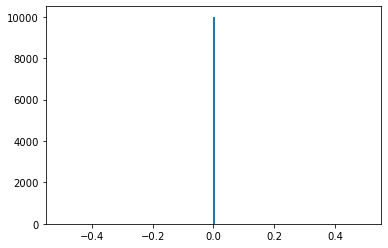

Time: 1.0


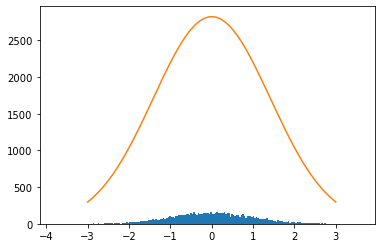

Time: 2.0


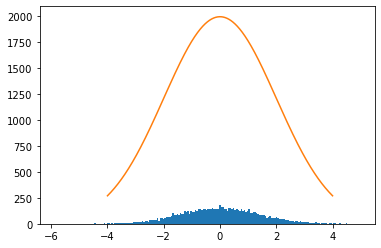

Time: 3.0


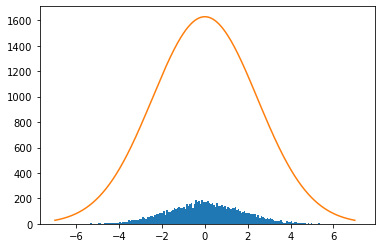

Time: 4.0


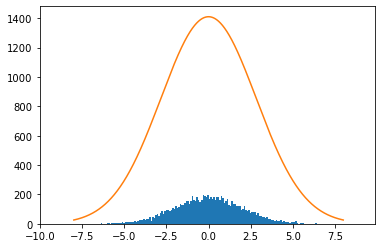

Time: 5.0


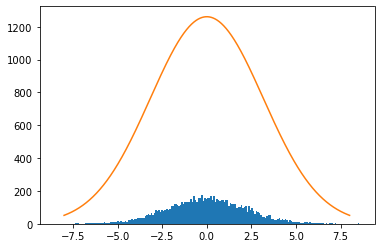

Time: 6.0


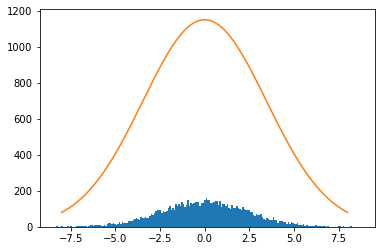

Time: 7.0


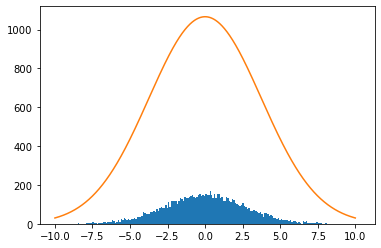

Time: 8.0


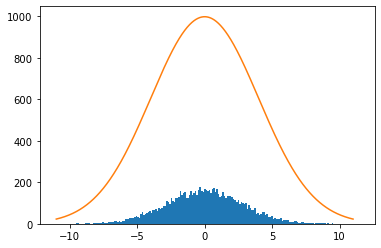

Time: 9.0


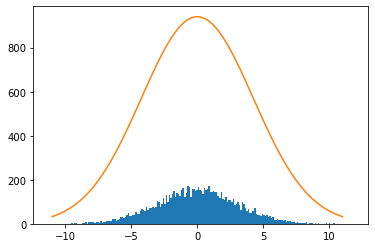

Time: 99.9


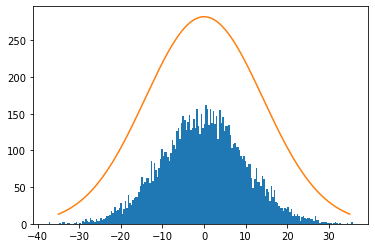

Time: 199.8


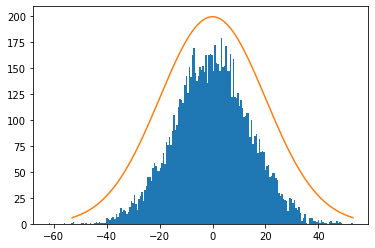

Time: 299.7


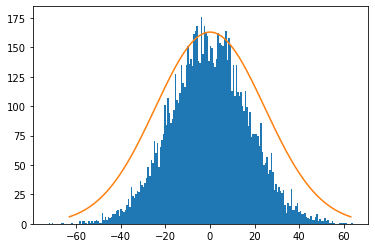

Time: 399.6


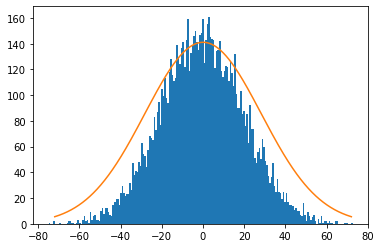

Time: 499.5


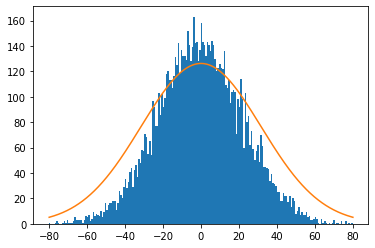

Time: 500


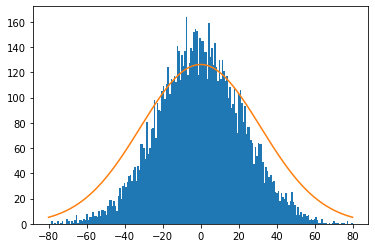

In [13]:
for t in range(Timesteps):
    # Plot the distribution
    if t in range(0, 100, 10) or t%(PlotPerT//dt) == 0:
        print('Time:',t*dt)
        DensityPlot(Pop)
        if t != 0:
            AnalyticPlot(t*dt, int(max(Pop)))
        plt.show()
    # Perform random movement
    Pop = RandomWalk(Pop) 
    
print('Time:', T)
DensityPlot(Pop)
AnalyticPlot(t*dt, int(max(Pop)))

plt.savefig('diffusion.png')
plt.show()

### Reaction-Diffusion

In [15]:
# Involve logistic growth, R the coefficient for Rn(1-n)
def LogisticGrowth(Pop, R):
    X = int(max(Pop))
    bin_size = X/100
    
    # Bins record the right boundaries of the bins (from the leftmost to the rightmost)
    Bins = [-X+(i+1)*bin_size for i in range(200)] 
    
    # Bin_pop records the current population inside each bin
    Bin_pop = [0 for i in range(200)]
    
    Pop_sort = np.sort(Pop)
    
    for i in Pop_sort:
        Bin_count = 0
        while i > Bins[Bin_count] and Bin_count <198:
            Bin_count += 1
        Bin_pop[Bin_count] += 1
    
    for b_num in range(len(Bin_pop)):
        n = Bin_pop[b_num]
        new_birth = np.linspace(-X+b_num*bin_size, -X+(b_num+1)*bin_size, int(R*(n/len(Pop))*(1-n/len(Pop))))
        Pop = np.append(Pop, new_birth)
    
    return Pop

In [16]:
# Plot the current density
def DensityPlot2(Pop):
    plt.figure()
    plt.hist(Pop, bins = 200) 
    plt.show()
    return

In [17]:
def Simulation(Pop, T, PlotPerT):
    for t in range(Timesteps):
        # Plot the distribution
        if t in range(0, 100, 10) or t%(PlotPerT//dt) == 0:
            print('Time:',t*dt)
            DensityPlot2(Pop)
            
        # Perform random movement
        Pop = RandomWalk(Pop) 
        # Consider Logistic Growth
        Pop = LogisticGrowth(Pop, 2)
        
    print('Time:', T)
    DensityPlot2(Pop)


Time: 0.0


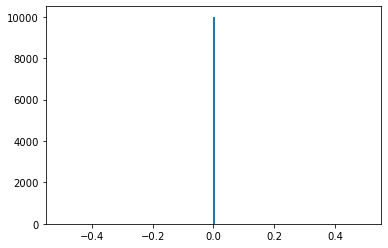

Time: 1.0


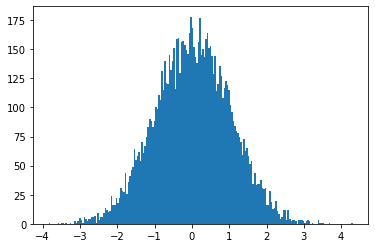

Time: 2.0


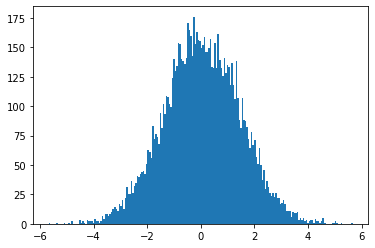

Time: 3.0


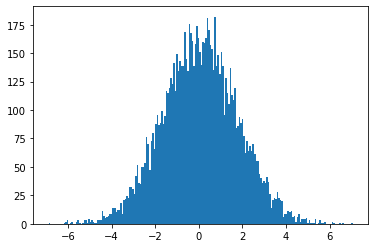

Time: 4.0


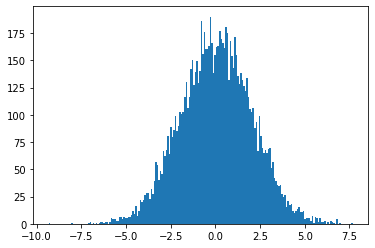

Time: 5.0


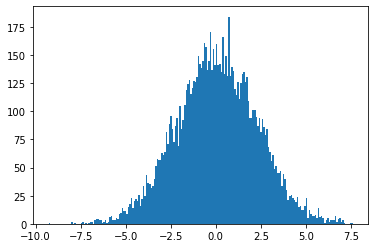

Time: 6.0


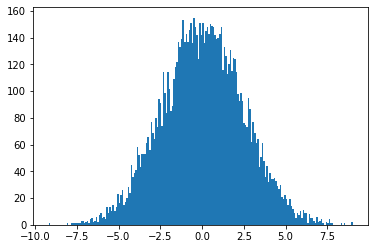

Time: 7.0


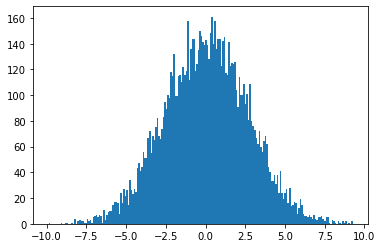

Time: 8.0


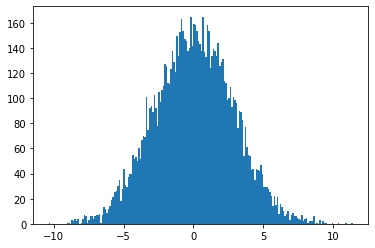

Time: 9.0


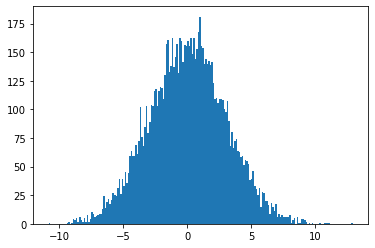

Time: 99.9


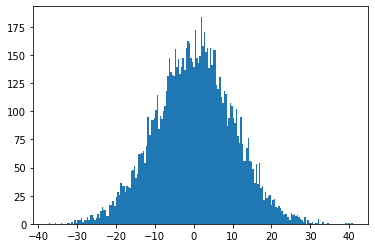

Time: 199.8


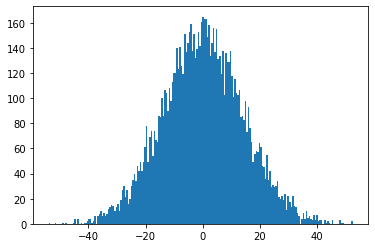

Time: 299.7


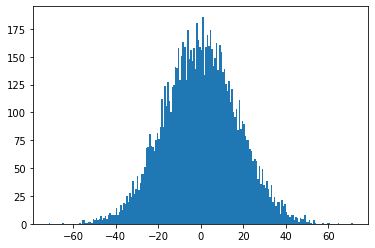

Time: 399.6


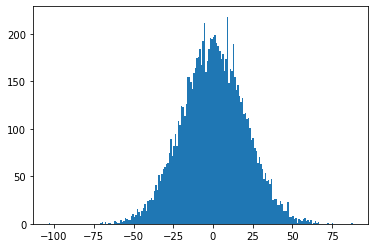

Time: 499.5


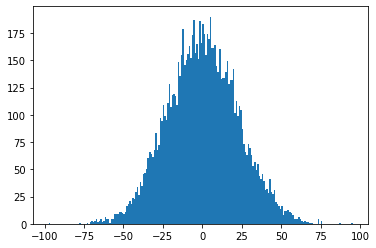

Time: 500


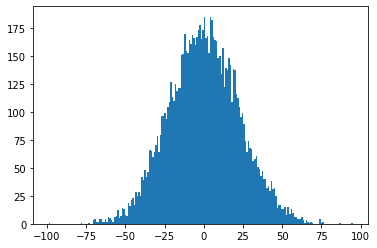

In [18]:
Simulation(Pop, T, PlotPerT)